In [3]:
import numpy as np
import cv2 as cv
import shutil
import math
import os

In [2]:
# Original Image size in Inria Aerial Image Dataset
master_size = 5000

# Desired tile size  
image_size = 384

# Overlap percentage 
overlap = 0.3

# working directory 
root_folder = os.getcwd()

# Original dataset folder 
data_folder = os.path.join(root_folder, 'AerialImageDataset')

In [3]:

# Original dataset folders
src_train_folder = os.path.join(data_folder, 'train', 'images')
src_train_folder_gt = os.path.join(data_folder, 'train', 'gt')
src_test_folder = os.path.join(data_folder, 'test', 'images')

print('Training images address    = ', src_train_folder)
print('Training gt images address = ', src_train_folder_gt)
print('Testing images address     = ', src_test_folder)



Training images address    =  c:\Users\egbes\Documents\PGMP\Code\AerialImageDataset\train\images
Training gt images address =  c:\Users\egbes\Documents\PGMP\Code\AerialImageDataset\train\gt
Testing images address     =  c:\Users\egbes\Documents\PGMP\Code\AerialImageDataset\test\images


In [4]:
# Training set file names
src_train_images = os.listdir(src_train_folder)
print(src_train_images)
print('Total number of main images = ',len(src_train_images))

['austin1.tif', 'austin10.tif', 'austin11.tif', 'austin12.tif', 'austin13.tif', 'austin14.tif', 'austin15.tif', 'austin16.tif', 'austin17.tif', 'austin18.tif', 'austin19.tif', 'austin2.tif', 'austin20.tif', 'austin21.tif', 'austin22.tif', 'austin23.tif', 'austin24.tif', 'austin25.tif', 'austin26.tif', 'austin27.tif', 'austin28.tif', 'austin29.tif', 'austin3.tif', 'austin30.tif', 'austin31.tif', 'austin32.tif', 'austin33.tif', 'austin34.tif', 'austin35.tif', 'austin36.tif', 'austin4.tif', 'austin5.tif', 'austin6.tif', 'austin7.tif', 'austin8.tif', 'austin9.tif', 'kitsap1.tif', 'kitsap10.tif', 'kitsap11.tif', 'kitsap12.tif', 'kitsap13.tif', 'kitsap14.tif', 'kitsap15.tif', 'kitsap16.tif', 'kitsap17.tif', 'kitsap18.tif', 'kitsap19.tif', 'kitsap2.tif', 'kitsap20.tif', 'kitsap21.tif', 'kitsap22.tif', 'kitsap23.tif', 'kitsap24.tif', 'kitsap25.tif', 'kitsap26.tif', 'kitsap27.tif', 'kitsap28.tif', 'kitsap29.tif', 'kitsap3.tif', 'kitsap30.tif', 'kitsap31.tif', 'kitsap32.tif', 'kitsap33.tif', 'ki

In [5]:
# Testing set file names
src_test_images = os.listdir(src_test_folder)
print(src_test_images)

['bellingham1.tif', 'bellingham10.tif', 'bellingham11.tif', 'bellingham12.tif', 'bellingham13.tif', 'bellingham14.tif', 'bellingham15.tif', 'bellingham16.tif', 'bellingham17.tif', 'bellingham18.tif', 'bellingham19.tif', 'bellingham2.tif', 'bellingham20.tif', 'bellingham21.tif', 'bellingham22.tif', 'bellingham23.tif', 'bellingham24.tif', 'bellingham25.tif', 'bellingham26.tif', 'bellingham27.tif', 'bellingham28.tif', 'bellingham29.tif', 'bellingham3.tif', 'bellingham30.tif', 'bellingham31.tif', 'bellingham32.tif', 'bellingham33.tif', 'bellingham34.tif', 'bellingham35.tif', 'bellingham36.tif', 'bellingham4.tif', 'bellingham5.tif', 'bellingham6.tif', 'bellingham7.tif', 'bellingham8.tif', 'bellingham9.tif', 'bloomington1.tif', 'bloomington10.tif', 'bloomington11.tif', 'bloomington12.tif', 'bloomington13.tif', 'bloomington14.tif', 'bloomington15.tif', 'bloomington16.tif', 'bloomington17.tif', 'bloomington18.tif', 'bloomington19.tif', 'bloomington2.tif', 'bloomington20.tif', 'bloomington21.ti

In [6]:
# set destination folders

train_folder_root = os.path.join(data_folder, 'train_{}x{}'.format(image_size, image_size))
train_folder = os.path.join(train_folder_root, 'images')
train_folder_gt = os.path.join(train_folder_root, 'gt')

print(train_folder_root)
print(train_folder)
print(train_folder_gt)


c:\Users\egbes\Documents\PGMP\Code\AerialImageDataset\train_384x384
c:\Users\egbes\Documents\PGMP\Code\AerialImageDataset\train_384x384\images
c:\Users\egbes\Documents\PGMP\Code\AerialImageDataset\train_384x384\gt


In [32]:
# Creating destination folder root 
if not os.path.exists(train_folder_root):
    os.makedirs(train_folder_root)

# Creating destination training folder     
if not os.path.exists(train_folder):
    os.makedirs(train_folder)
else:
    shutil.rmtree(train_folder)

# Creating destination training gt folder       
if not os.path.exists(train_folder_gt):
    os.makedirs(train_folder_gt)
else:
    shutil.rmtree(train_folder_gt)

In [33]:
# find the number of tiles with 0.3 percent overlap
#  (5000)/(384-(384*0.3)) 

count = math.ceil((master_size / (image_size-(image_size*overlap))))

# find the number of pixels for each step 
step = (master_size - image_size * overlap) / count
print('count =', count, ', step =', step)

count = 19 , step = 257.09473684210525


In [34]:
# slicing the main images and ground truths into tiles of 384 * 384 pixels
# each 5000 * 5000 source will be divided into 19 * 19 = 361 tiles

for filename in src_train_images:
    print(filename)
    master_img = cv.imread(os.path.join(src_train_folder, filename))
    master_img_gt = cv.imread(os.path.join(src_train_folder_gt, filename))

    for i in range(count):
        if i < count - 1:
            y = round(i * step)
        else:
            y = master_size - image_size # last tile of the column 

        for j in range(count):
            if j < count - 1:
                x = round(j * step)
            else:
                x = master_size - image_size # last tile of the row 
                
                
# Slice the main image based on (x,y)  first go ====>>> img = master_img[0:0+384, 0:0+384] = img = master_img[0:384,0:384]
            img = master_img[y:y+image_size, x:x+image_size]
            img_gt = master_img_gt[y:y+image_size, x:x+image_size]
        
# write the slice (tile) into disk 
# filename[:-4] ?? to get rid of file extension in original filename (ex: austin1.tif ==>>>  austin1 )

            img_fname = '{}_{}_{}.{}'.format(filename[:-4], i, j, 'jpg')
            img_gt_fname = '{}_{}_{}.{}'.format(filename[:-4], i, j, 'png')
            cv.imwrite(os.path.join(train_folder, img_fname), img)
            cv.imwrite(os.path.join(train_folder_gt, img_gt_fname), img_gt)

austin1.tif
austin10.tif
austin11.tif
austin12.tif
austin13.tif
austin14.tif
austin15.tif
austin16.tif
austin17.tif
austin18.tif
austin19.tif
austin2.tif
austin20.tif
austin21.tif
austin22.tif
austin23.tif
austin24.tif
austin25.tif
austin26.tif
austin27.tif
austin28.tif
austin29.tif
austin3.tif
austin30.tif
austin31.tif
austin32.tif
austin33.tif
austin34.tif
austin35.tif
austin36.tif
austin4.tif
austin5.tif
austin6.tif
austin7.tif
austin8.tif
austin9.tif
chicago1.tif
chicago10.tif
chicago11.tif
chicago12.tif
chicago13.tif
chicago14.tif
chicago15.tif
chicago16.tif
chicago17.tif
chicago18.tif
chicago19.tif
chicago2.tif
chicago20.tif
chicago21.tif
chicago22.tif
chicago23.tif
chicago24.tif
chicago25.tif
chicago26.tif
chicago27.tif
chicago28.tif
chicago29.tif
chicago3.tif
chicago30.tif
chicago31.tif
chicago32.tif
chicago33.tif
chicago34.tif
chicago35.tif
chicago36.tif
chicago4.tif
chicago5.tif
chicago6.tif
chicago7.tif
chicago8.tif
chicago9.tif
kitsap1.tif
kitsap10.tif
kitsap11.tif
kitsap12

In [5]:
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
# from tqdm import tqdm
# from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from tensorflow import keras
from keras.models import Model, load_model
from keras.layers import Input, Dropout, Lambda, Conv2D, MaxPooling2D, Dense, Layer, UpSampling2D, RandomFlip, RandomRotation,BatchNormalization,Activation
from keras.layers import Concatenate, Dot, Conv2DTranspose, MaxPool2D, multiply
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf
import glob
import matplotlib.image as img
from skimage.transform import rescale, resize

%matplotlib inline

In [3]:
cd = os.getcwd()
print(cd)

c:\Users\egbes\Documents\PGMP\Code


In [9]:
# color input images
IMG_CHANNELS = 3

# image dimension 
IMG_WIDTH = 384
IMG_HEIGHT = 384



TRAIN_PATH = glob.glob('AerialImageDataset//train_384x384//images//*')
GT_PATH = glob.glob('AerialImageDataset//train_384x384//gt//*')
TEST_PATH = glob.glob('AerialImageDataset//test//images//*')


In [10]:
print(len(TRAIN_PATH), len(GT_PATH), len(TEST_PATH))

51984 51984 180


In [6]:
TRAIN_PATH

['AerialImageDataset//train_384x384//images\\austin10_0_0.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_1.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_10.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_11.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_12.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_13.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_14.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_15.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_16.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_17.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_18.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_2.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_3.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_4.jpg',
 'AerialImageDataset//train_384x384//images\\austin10_0_5.jpg',
 'AerialImageDataset//train_384

In [7]:
GT_PATH

['AerialImageDataset//train_384x384//gt\\austin10_0_0.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_1.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_10.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_11.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_12.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_13.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_14.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_15.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_16.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_17.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_18.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_2.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_3.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_4.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_5.png',
 'AerialImageDataset//train_384x384//gt\\austin10_0_6.png',
 'AerialImageDataset//train_384

In [11]:
seed = 42
random.seed = seed
np.random.seed = seed

In [12]:
# Get training, gt and test full path file names

train_ids = [fn for fn in TRAIN_PATH]
test_ids = [fn for fn in TEST_PATH]
gt_ids = [fn for fn in GT_PATH]

print(gt_ids[:4])

['AerialImageDataset//train_384x384//gt\\austin10_0_0.png', 'AerialImageDataset//train_384x384//gt\\austin10_0_1.png', 'AerialImageDataset//train_384x384//gt\\austin10_0_10.png', 'AerialImageDataset//train_384x384//gt\\austin10_0_11.png']


In [13]:
print('Total number of images in training set = ', len(train_ids))

Total number of images in training set =  51984


In [14]:
# Get and resize train images and masks
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array, array_to_img

# iterate through training image names and read images as array
X_train = [img_to_array(load_img(img)) for img in train_ids[:10000]]
X_train = np.array(X_train)
X_train = X_train.astype('float32')
X_train /= 255


MemoryError: Unable to allocate 16.5 GiB for an array with shape (10000, 384, 384, 3) and data type float32

In [12]:
print("Training dataset size = ",X_train.shape)
print('Min = ', X_train.min())
print('Max = ', X_train.max())

Training dataset size =  (10000, 384, 384, 3)
Min =  0.0
Max =  1.0


In [13]:
from skimage.color import rgb2gray

# zero boolian array
Y_train = np.zeros((len(train_ids[:10000]), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)

# iterate through training ground truth and read them as array and convert to grayscale and add a dummy dimension
Y_train_gray = [np.expand_dims(rgb2gray(img_to_array(load_img(img))),2) for img in gt_ids[:10000]]
Y_train_gray = np.array(Y_train_gray)
Y_train_gray /= 255
# convert grayscale gt to binary gt
Y_train = np.maximum(Y_train, Y_train_gray)


In [14]:
Y_train_gray.shape

(10000, 384, 384, 1)

In [15]:
print("Testing dataset size = ",Y_train.shape)
print('Min = ', Y_train.min())
print('Max = ', Y_train.max())

Testing dataset size =  (10000, 384, 384, 1)
Min =  0.0
Max =  1.0


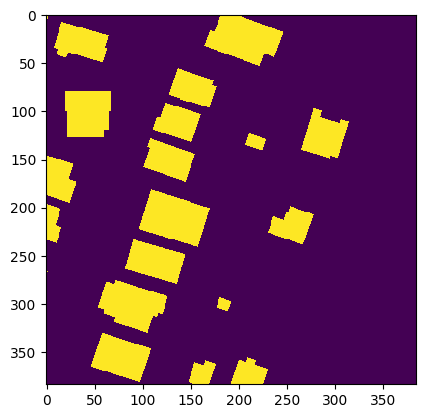

In [16]:
%matplotlib inline
#
plt.imshow(Y_train[721], interpolation='none')
plt.show()

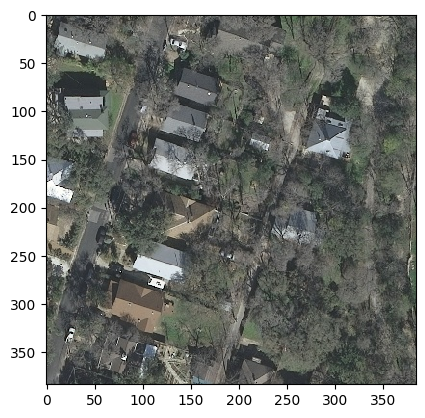

In [17]:
X_train[2].shape
plt.imshow(X_train[721], interpolation='none')
plt.show()

# Define the U-net model

![](OL/seg5.png)

In [18]:
input_size = (IMG_HEIGHT,IMG_WIDTH,3)

In [19]:
from keras.layers import *
from keras.optimizers import *

In [46]:
def data_augmentation_layer():
  """Creates a data augmentation layer for flipping and rotating images."""
  flip_layer = RandomFlip("horizontal_and_vertical")
  rotation_range = 15  # Adjust rotation range as needed (in degrees)
  rotation_layer = RandomRotation(rotation_range/180.0)
  return keras.Sequential([flip_layer, rotation_layer])

In [47]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

#    x = Conv2D(num_filters, 3, padding="same")(x)
#    x = BatchNormalization()(x)
#    x = Activation("relu")(x)

    return x

In [48]:
def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

In [49]:
def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [51]:
def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # print(s1.shape, s2.shape, s3.shape, s4.shape)
    # print(p1.shape, p2.shape, p3.shape, p4.shape)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model

In [52]:
model_1 = build_unet(input_size)

In [53]:
model_1.compile(optimizer = Adam(learning_rate=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "UNET"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 384, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 384, 384,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 384, 384,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 384, 384,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 192, 192,  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 192, 192,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 192, 192,  │        512 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 192, 192,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 96, 96,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 96, 96,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 96, 96,    │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 96, 96,    │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 48, 48,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 48, 48,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 48,    │      2,048 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 48, 48,    │          0 │ batch_normalizat… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 24, 24,    │          0 │ activation_3[0][

 Total params: 15,336,513 (58.50 MB)

 Trainable params: 15,330,625 (58.48 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [1]:
with tf.device('/GPU:0'):
  earlystopper = EarlyStopping(patience=2, verbose=1)
  checkpointer = ModelCheckpoint('/content/drive/MyDrive/AML_Project/Models/model1_c2_cp.h5', verbose=1, save_best_only=True)
  reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, min_lr=1e-7, verbose=1)
  results = model_1.fit(X_train, Y_train, validation_split=0.1, batch_size=32, epochs=10,
                      callbacks=[earlystopper, checkpointer, reduceLROnPlateau])

NameError: name 'tf' is not defined

In [ ]:
model_1.save('/content/drive/MyDrive/AML_Project/Models/model1_c2_.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history_dict1 = results.history

accuracy1 = history_dict1['accuracy']
val_accuracy1 = history_dict1['val_accuracy']
print(accuracy1, '\n', val_accuracy1)

[0.862831175327301, 0.8992035388946533, 0.9106199741363525, 0.9193228483200073, 0.9259134531021118, 0.930191159248352, 0.933999240398407] 
 [0.8235737085342407, 0.8621698021888733, 0.874210774898529, 0.8761288523674011, 0.882787823677063, 0.8818441033363342, 0.8760246634483337]


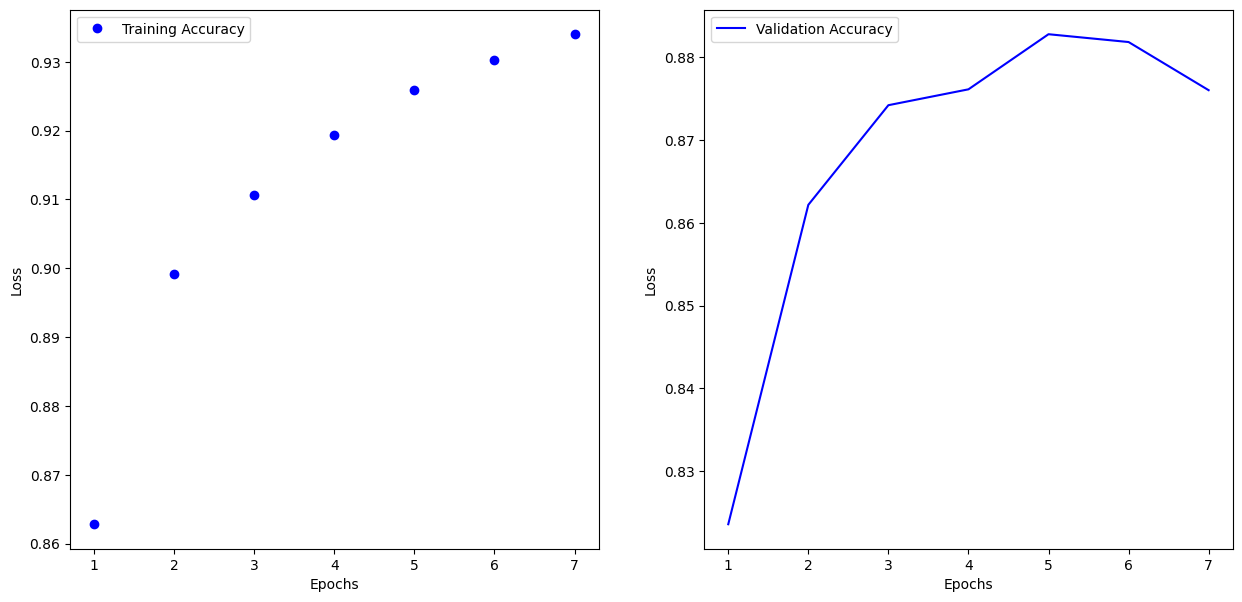

In [ ]:
# Model 1 Accuracy Plot
epochs1 = range(1, len(accuracy1) + 1)
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(epochs1, accuracy1, 'bo', label='Training Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].plot(epochs1, val_accuracy1, 'b', label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

In [ ]:
loss1 = history_dict1['loss']
val_loss1 = history_dict1['val_loss']
print(loss1, '\n', val_loss1)

[0.334349662065506, 0.25246211886405945, 0.222679004073143, 0.20125211775302887, 0.18546563386917114, 0.17533409595489502, 0.16444173455238342] 
 [0.39704975485801697, 0.3413732945919037, 0.31386351585388184, 0.3036956489086151, 0.2830270826816559, 0.30429360270500183, 0.30888059735298157]


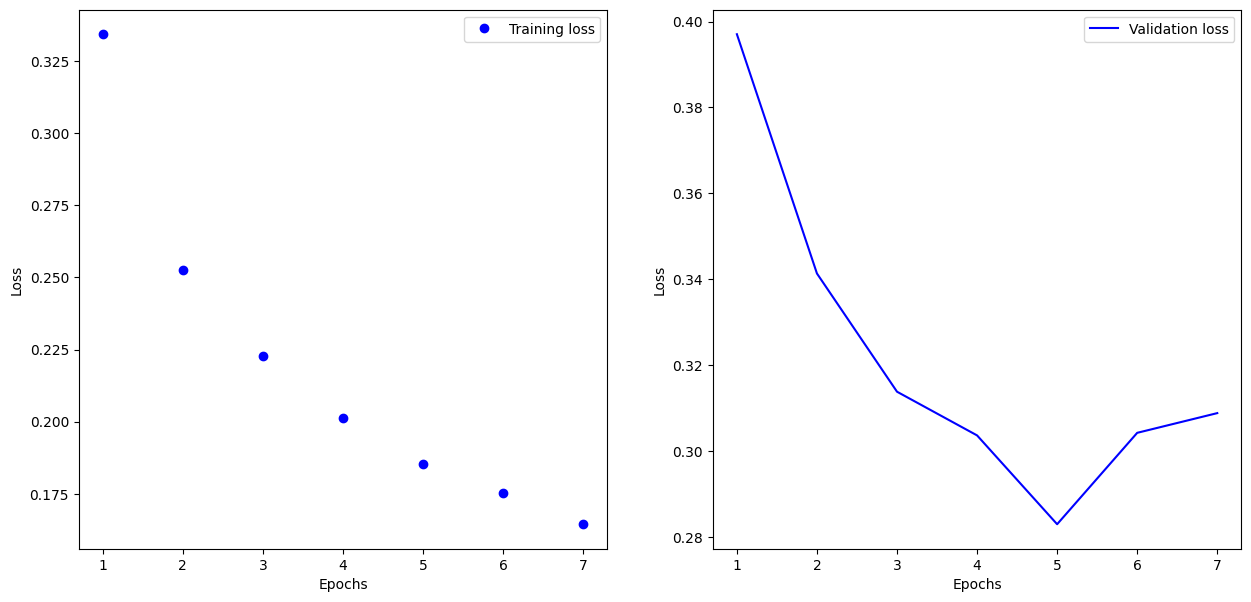

In [ ]:
# Model 1 Loss plot
epochs1 = range(1, len(loss1) + 1)
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(epochs1, loss1, 'bo', label='Training loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].plot(epochs1, val_loss1, 'b', label='Validation loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

# **Attention Model**

In [20]:
import tensorflow as tf

def conv_block(x, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

In [21]:
def encoder_block(x, num_filters):
    x = conv_block(x, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

In [22]:
def attention_gate(g, s, num_filters):
    Wg = Conv2D(num_filters, 1, padding="same", kernel_regularizer=keras.regularizers.L2(l2=0.1))(g)
    Wg = BatchNormalization()(Wg)

    Ws = Conv2D(num_filters, 1, padding="same")(s)
    Ws = BatchNormalization()(Ws)

    out = Activation("relu")(Wg + Ws)
    out = Conv2D(num_filters, 1, padding="same")(out)
    out = Activation("sigmoid")(out)

    return out * s

In [23]:
def decoder_block(x, s, num_filters):
    x = UpSampling2D(interpolation="bilinear")(x)
    s = attention_gate(x, s, num_filters)
    x = Concatenate()([x, s])
    x = conv_block(x, num_filters)
    return x

In [25]:
def attention_unet(input_shape):
    """ Inputs """
    inputs = Input(input_shape)

    """ Encoder """
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)
    
    b1 = conv_block(p4, 1024)
    
    """ Decoder """
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    """ Outputs """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    """ Model """
    model = Model(inputs, outputs, name="Attention-UNET")
    return model

In [26]:
model2 = attention_unet(input_size)

In [27]:
model2.compile(optimizer = Adam(learning_rate=1e-2), loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "Attention-UNET"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 384, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 384, 384,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 384, 384,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 384, 384,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 384, 384,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 384, 384,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 384, 384,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 192, 192,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 192, 192,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 192, 192,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 192, 192,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 192, 192,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 192, 192,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 192, 192,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 96, 96,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 96, 96,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 96, 96,    │      1,024 │ conv2d_4[0][0]  

 Total params: 32,805,697 (125.14 MB)

 Trainable params: 32,790,081 (125.08 MB)

 Non-trainable params: 15,616 (61.00 KB)

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

In [41]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets manually
X_train_A, X_val, Y_train_A, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Use ImageDataGenerator for training and validation
train_generator = datagen.flow(X_train_A, Y_train_A, batch_size=16)
validation_generator = datagen.flow(X_val, Y_val, batch_size=16)

MemoryError: Unable to allocate 13.2 GiB for an array with shape (8000, 384, 384, 3) and data type float32

In [ ]:

train_generator = datagen.flow(X_train, Y_train, batch_size=16)
# results2 = model2.fit(train_generator, validation_split=0.2, epochs=10,
#                       callbacks=[earlystopper, checkpointer, reduceLROnPlateau])


In [38]:
with tf.device('/GPU:0'):
  earlystopper = EarlyStopping(patience=2, verbose=1)
  checkpointer = ModelCheckpoint('/AerialImageDatasets/model2_c2_cp_2.h5', verbose=1, save_best_only=True)
  reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, min_lr=1e-7, verbose=1)
  results2 = model2.fit(train_generator, validation_split=0.2, batch_size=16, epochs=10,
                      callbacks=[earlystopper, checkpointer, reduceLROnPlateau])

ValueError: Argument `validation_split` is only supported for tensors or NumPy arrays.Found incompatible type in the input: [<class 'keras.src.legacy.preprocessing.image.NumpyArrayIterator'>]

In [ ]:
model2.save('AerialImageDataset/model2_c2_2.h5')

In [ ]:
history_dict = results2.history

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
print(accuracy, '\n', val_accuracy)

[0.8663793802261353, 0.8964368104934692, 0.9078546166419983, 0.9159876704216003, 0.92994225025177, 0.9339247941970825, 0.9357417821884155, 0.9377844333648682, 0.9394298195838928, 0.9405412077903748] 
 [0.8261288404464722, 0.8664659261703491, 0.8572375774383545, 0.8319421410560608, 0.8844150304794312, 0.8836856484413147, 0.8848182559013367, 0.8889976739883423, 0.8791694641113281, 0.8962863087654114]


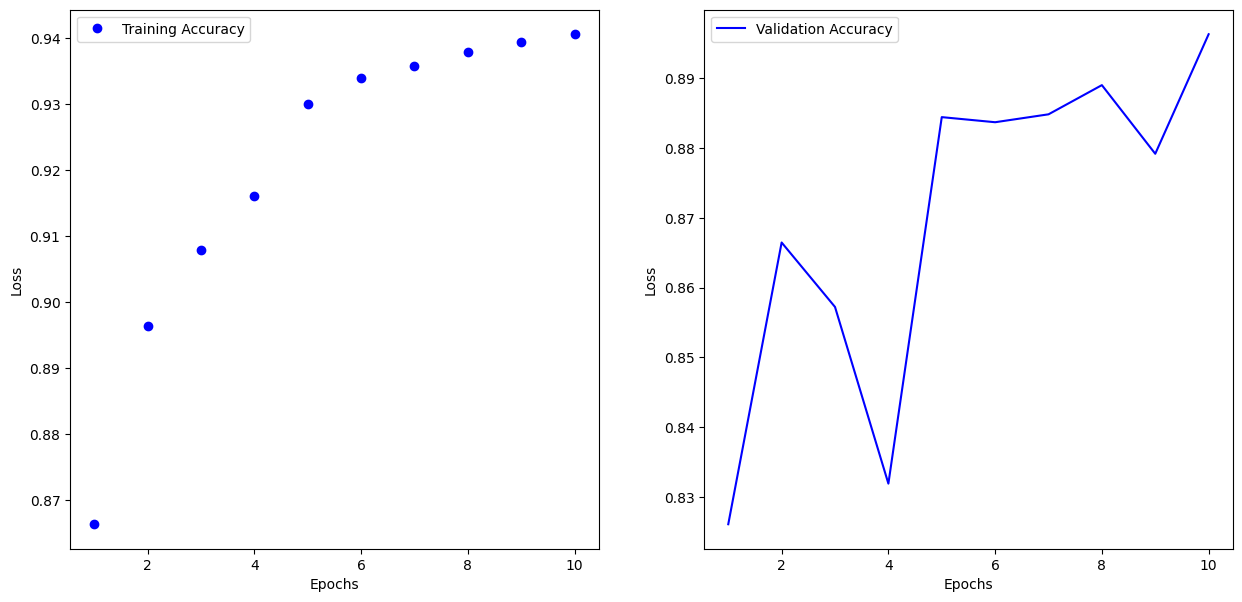

In [ ]:
# Model 2 Accuracy Plot
epochs = range(1, len(accuracy) + 1)
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
print(loss, '\n', val_loss)

[0.3325352072715759, 0.26125726103782654, 0.23218019306659698, 0.21123242378234863, 0.17720888555049896, 0.16762596368789673, 0.16329751908779144, 0.15796524286270142, 0.15380297601222992, 0.1508483588695526] 
 [0.396097332239151, 0.32316914200782776, 0.33398520946502686, 0.37556394934654236, 0.2835250794887543, 0.2855720520019531, 0.2872215211391449, 0.27637961506843567, 0.3033822476863861, 0.25739070773124695]


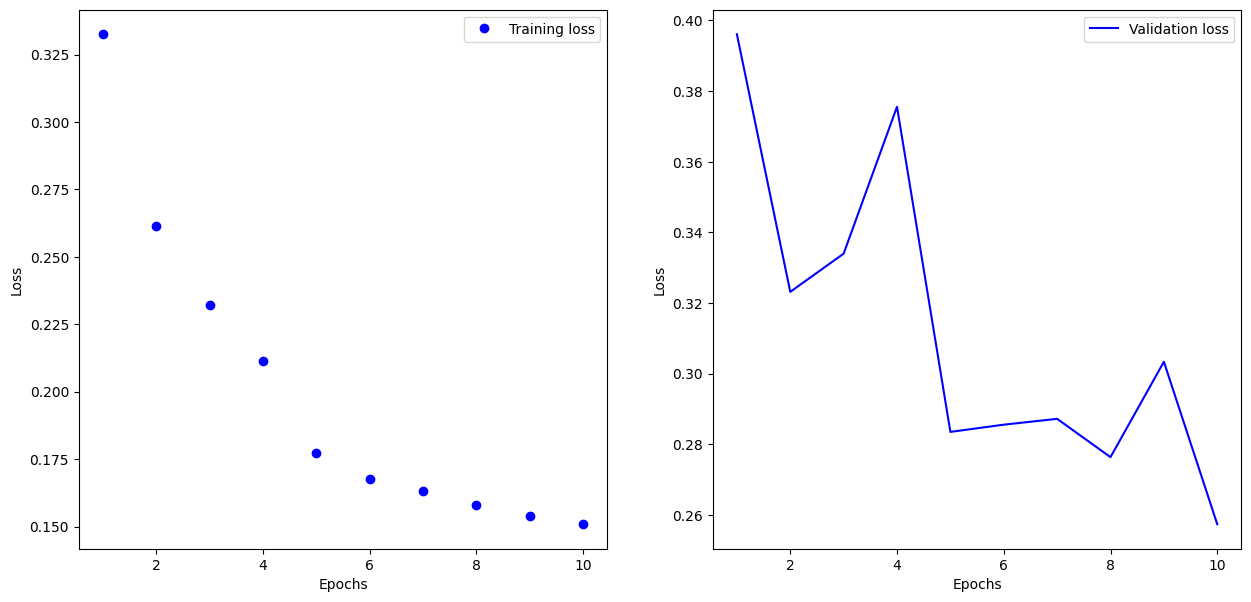

In [ ]:
# Model 2 Loss plot
epochs1 = range(1, len(loss) + 1)
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(epochs, loss, 'bo', label='Training loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

# **Testing Models**

In [1]:
# load the Aug model
from tensorflow import keras
model1 = keras.models.load_model('models/model_85.keras')

2025-02-28 13:24:54.602653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740749094.743375 1728873 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740749094.780371 1728873 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 13:24:55.228591: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1740749104.047448 1728873 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17

In [ ]:
model2 = keras.models.load_model('/content/drive/MyDrive/AML_Project/Models/model2_c2_.h5')

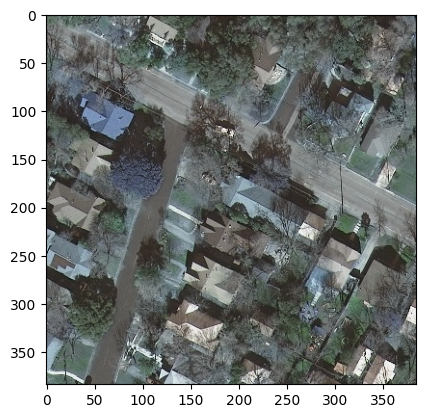

In [6]:
cat = cv.imread('AerialImageDataset/train_384x384/images/austin20_1_1.jpg')
resized_cat = resize(cat,(384,384,3))
plt.imshow(resized_cat, cmap='gray')
plt.show()

In [10]:
pred1 = model1.predict(np.expand_dims(resized_cat, 0))
image1 = pred1.reshape(384,384)*255
image1.min()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


np.float32(0.023298044)

In [ ]:
pred2 = model2.predict(np.expand_dims(resized_cat, 0))
image2 = pred2.reshape(384,384)
image2.min()

1/1 [==============================] - 1s 1s/step


3.957668e-05

In [5]:
image1.shape

(384, 384)

In [16]:
image2.shape

NameError: name 'image2' is not defined

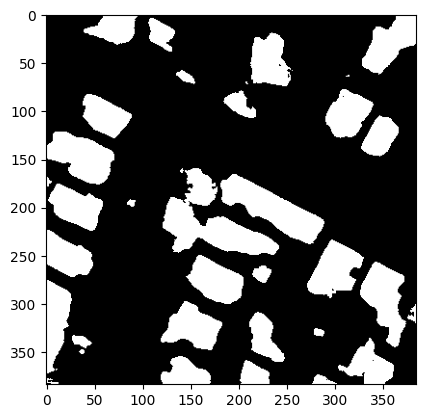

In [15]:
ret, pred = cv.threshold(image1, 170, 255, cv.THRESH_BINARY)
plt.imshow(pred, cmap='gray')
plt.show()

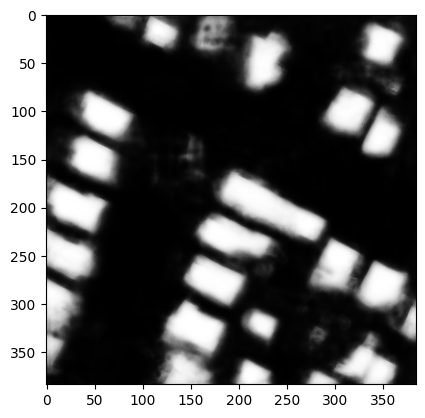

In [ ]:
plt.imshow(image2, cmap='gray')

In [ ]:
test_path = glob.glob('/content/content/Dataset_1/test_384x384/images/*')
gt_path = glob.glob('/content/content/Dataset_1/test_384x384/gt/*')

In [ ]:
from skimage.color import rgb2gray
def calc_iou(model, test_pt, gt_pt):
  iou=[]
  for count,fn in enumerate(test_pt):
      cat = img.imread(fn)
      cat = resize(cat,(384,384,3))
      pred = model.predict(np.expand_dims(cat, 0))
      pred = pred.reshape(384,384)*255
      ret, pred = cv2.threshold(pred, 50, 255, cv2.THRESH_BINARY)

      gt = img.imread(gt_pt[count])
      gt = resize(gt,(384,384,3))
      gt = rgb2gray(gt)

      intersection = np.logical_and(gt, pred)
      union = np.logical_or(gt, pred)
      iou_score = np.sum(intersection) / np.sum(union)
      iou.append(iou_score)
      return iou



In [ ]:
iou_1 = calc_iou(model1, test_path, gt_path)
sum(iou_1) / len(iou_1)

1/1 [==============================] - 2s 2s/step


0.21772401092271543

In [ ]:
iou_2 = calc_iou(model2, test_path, gt_path)
sum(iou_2) / len(iou_2)

1/1 [==============================] - 1s 1s/step


0.22504581927952072

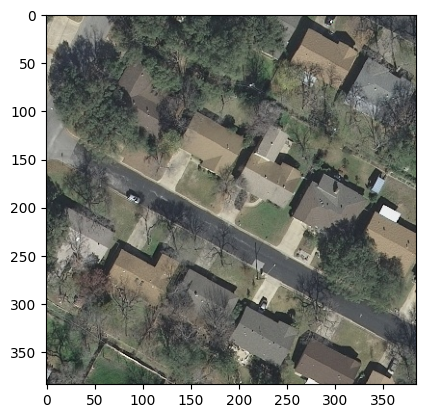

In [7]:
cat = img.imread('AerialImageDataset/train_384x384/images/austin20_0_11.jpg')
cat = resize(cat,(384,384,3))
plt.imshow(cat, cmap='gray')
plt.show()

1/1 [==============================] - 1s 1s/step


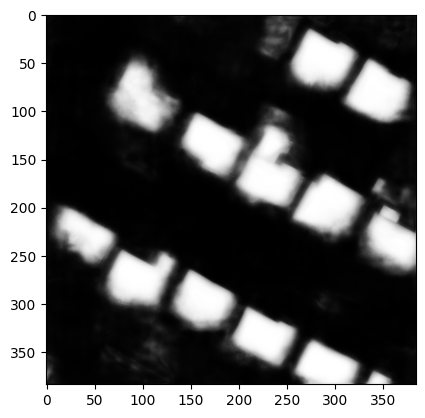

In [ ]:
pred = model2.predict(np.expand_dims(cat, 0))
pred = pred.reshape(384,384)*255
# ret, pred = cv2.threshold(pred, 150, 255, cv2.THRESH_BINARY)
plt.imshow(pred, cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


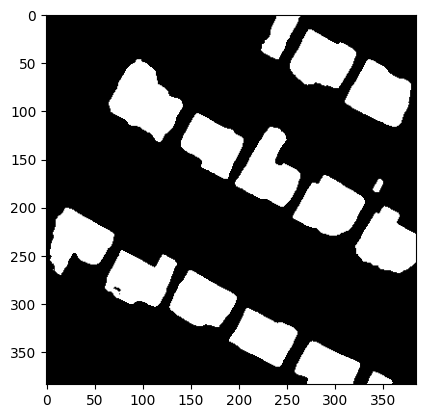

In [15]:
pred = model1.predict(np.expand_dims(cat, 0))
pred = pred.reshape(384,384)*255
ret, pred = cv2.threshold(pred, 125, 255, cv2.THRESH_BINARY)
plt.imshow(pred, cmap='gray')

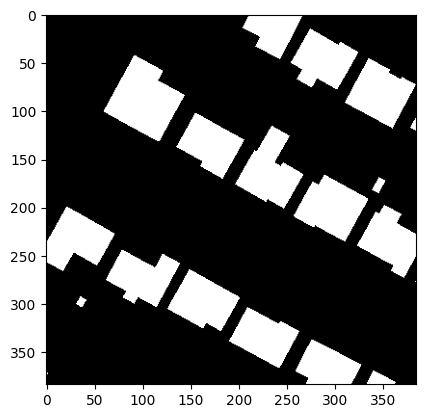

In [11]:
from skimage.color import rgb2gray
gt = img.imread('AerialImageDataset/train_384x384/gt/austin20_0_11.png')
gt = resize(gt,(384,384,3))

gt = rgb2gray(gt)
plt.imshow(gt, cmap='gray')
plt.show()

In [12]:
import numpy as np

In [13]:
intersection = np.logical_and(gt, pred)
union = np.logical_or(gt, pred)
iou_score = np.sum(intersection) / np.sum(union)

In [14]:
iou_score

np.float64(0.8786216037110669)